# DS 2500 HW 3

# Part 1:

In [1]:
class Shape:
    """ describes a shape
    
    Attributes:
        pos_tuple (tuple): position on x/y plane
        color (str): for plot
        alpha (float): transparency value
    """
    def __init__(self, pos_tuple, color, alpha):
        self.pos_tuple = pos_tuple
        self.color = color
        self.alpha = alpha
        
    def offset(self, x_diff, y_diff):
        """ shifts the shape's x/y position
        
        Args:
            x_diff (float): change in x corrdinate
            y_diff (float): change in y coordinate
        """
        x = self.pos_tuple[0] + x_diff
        y = self.pos_tuple[1] + y_diff
        self.pos_tuple = (x, y)
        
    def scale(self, scale):
        """ scales the size of the shape
        
        Args:
            scale (float):
        """
        # determine the instance of shape object before scaling
        if type(self) is Circle:
            self.radius *= scale
        else:
            self.height *= scale
            self.width *= scale

class Circle(Shape):
    """ describes a circle
    
    Attributes:
        radius (float): measure of circle's radius
        angle (float): optional plotting argument
    """
    def __init__(self, radius, pos_tuple = (0, 0), color = "k", alpha = 1, angle = 0):
        super().__init__(pos_tuple, color, alpha)
        self.radius = radius
        self.angle = angle
        
    def plot(self, ax):
        """ plots shape on graph
        
        Args:
            ax (plt.Axes): an axes object
        """
        patch = patches.Circle(self.pos_tuple, self.radius, color = self.color, 
                               alpha = self.alpha, angle = self.angle)
        ax.add_patch(patch)
        
        
class Rectangle(Shape):
    """ describles a rectangle
    
    Attributes:
        height (float): rectangle's height
        width (float): rectangle's width
        angle (float): rotation in degrees
    """
    def __init__(self, height, width, angle = 0, pos_tuple = (0, 0), color = "k", alpha = 1):
        super().__init__(pos_tuple, color, alpha)
        self.height = height
        self.width = width
        self.angle = angle
    
    def plot(self, ax):
        """ plots shape on graph
        
        Args:
            ax (plt.Axes): an axes object
        """
        patch = patches.Rectangle(self.pos_tuple, self.width, self.height, 
                                  color = self.color, alpha = self.alpha, angle = self.angle)
        ax.add_patch(patch)

# Part 1.1 (18 points)
When complete, the code below should produce this image:

<img src="https://i.ibb.co/J2t5jpW/shapes0.png" width=300>

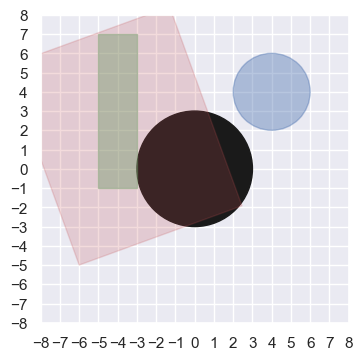

In [2]:
from hw3_helper import get_new_figure
from matplotlib import patches

# define shapes
circ0 = Circle(radius=3)
circ1 = Circle(pos_tuple=(4, 4), radius=2, color='b', alpha=.4)
rect0 = Rectangle(pos_tuple=(-5, -1), height=8, width=2, color='g', alpha=.4)
rect1 = Rectangle(pos_tuple=(-6, -5), height=11, width=9, color='r', alpha=.2, angle=20)

# collect them in a tuple 
shape_tup = circ0, circ1, rect0, rect1

# build new figure and plot each shape
fig, ax = get_new_figure()
for shape in shape_tup:
    shape.plot(ax) 

# Part 1.2 (8 points)
When complete, the code below should produce this image:

<img src="https://i.ibb.co/VqzWNJr/shapes1.png" width=300>


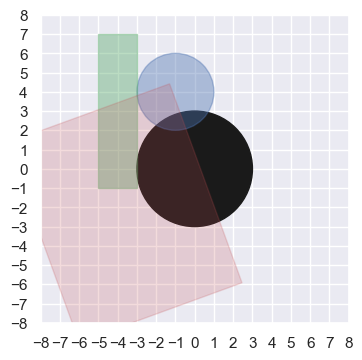

In [3]:
# (re)define shapes
circ0 = Circle(radius=3)
circ1 = Circle(pos_tuple=(4, 4), radius=2, color='b', alpha=.4)
rect0 = Rectangle(pos_tuple=(-5, -1), height=8, width=2, color='g', alpha=.4)
rect1 = Rectangle(pos_tuple=(-6, -5), height=11, width=9, color='r', alpha=.2, angle=20)

# collect them in a tuple 
shape_tup = circ0, circ1, rect0, rect1

# apply offset to the second item in shape_tup (circ1, the blue circle)
shape_tup[1].offset(x_diff = -5, y_diff = 0)

# apply offset to the last item in shape_tup (rect1, the red rectangle)
shape_tup[-1].offset(x_diff = 0, y_diff = -4)

# build new figure and plot each shape
fig, ax = get_new_figure()
for shape in shape_tup:
    shape.plot(ax)

# Part 1.3 (8 points)

<img src="https://i.ibb.co/5xJypCp/shapes2.png" width=300>


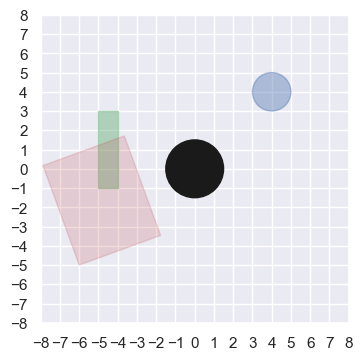

In [4]:
# (re)define shapes
circ0 = Circle(radius=3)
circ1 = Circle(pos_tuple=(4, 4), radius=2, color='b', alpha=.4)
rect0 = Rectangle(pos_tuple=(-5, -1), height=8, width=2, color='g', alpha=.4)
rect1 = Rectangle(pos_tuple=(-6, -5), height=11, width=9, color='r', alpha=.2, angle=20)

# collect them in a tuple 
shape_tup = circ0, circ1, rect0, rect1

# build new figure and plot each shape
fig, ax = get_new_figure()
for shape in shape_tup:
    # shrink object
    shape.scale(.5)
    
    # plot
    shape.plot(ax)

# Part 2: `IntFraction`

We build an `IntFraction` class, a fraction whose numerator and denominator are both integers.

A few suggestions / notes:
- complete the parts in the order given
    - some may depend on others and could be helpful
- be sure to study and fully digest the test cases before starting to build
- do not modify the test cases
    - you need not modify anything below "part 2.0" below

In [5]:
from math import gcd

class IntFraction:
    """ describes a fraction, numerator and denominator are both integers
    
    Attributes:
        num (int): numerator
        den (int): denominator
    """
    def __init__(self, num = 1, den = 1):
        num, den = IntFraction.simplify(num, den)
        self.num = num
        self.den = den
        
    def __repr__(self):
        return f"IntFraction(num={self.num}, den={self.den})"
    
    def __eq__(self, other):
        """ checks for equality between two IntFractions objects
        
        Args:
            other (IntFraction, str, int, float): value to test for equality
        """
        other = IntFraction.convert(other)
        
        return self.__dict__ == other.__dict__
    
    def __add__(self, other):
        """ adds two IntFraction objects together
        
        Args:
            other (IntFraction, str, int, float):
        """
        other = IntFraction.convert(other)
        
        # finds common denominator, operate
        den = other.den * self.den
        num = (other.den * self.num) + (self.den * other.num)
        
        return IntFraction(num, den)
    
    def __mul__(self, other):
        """ multiplies two IntFraction objects
        
        Args:
            other (IntFraction, str, int, float)
        """
        other = IntFraction.convert(other)
        
        # operate
        mnum = self.num * other.num
        mden = self.den * other.den
        
        return IntFraction(mnum, mden)
    
    def __sub__(self, other):
        """ subtracts two IntFraction objects
        
        Args:
            other (IntFraction, str, int, float):
        """
        other = IntFraction.convert(other)
        
        # operate
        den = self.den * other.den
        num = (self.num * other.den) - (other.num * self.den)
        
        return IntFraction(num, den)
    
    def __truediv__(self, other):
        """ divides two IntFraction objects
        
        Args:
            other (IntFraction, str, int, float):
        """
        other = IntFraction.convert(other)
        reciprocal = IntFraction(num = other.den, den = other.num)
        return self * reciprocal
    
    @classmethod
    def from_int(cls, val):
        """ returns an IntFraction object from an integer value
        
        Args:
            val (int):
        """
        return IntFraction(num = val)
    
    @classmethod
    def simplify(cls, num, den):
        """ finds a common divisior and simplifies the fraction
        
        Args:
            num (int): numerator
            den (int): denominator
        """
        div = gcd(int(num), int(den))
        simp_n = int(num / div)
        simp_d = int(den / div)
        
        # account for negative numbers
        if abs(simp_n) + abs(simp_d) == abs(simp_n + simp_d):
            return abs(simp_n), abs(simp_d)
        else:
            return -abs(simp_n), abs(simp_d)
    
    @classmethod
    def convert(cls, other):
        """ checks if an input is an IntFraction object, if not, will convert
        
        Args:
            other (IntFraction, str, int, float):
        """
        if type(other) == IntFraction:
            return other
        elif type(other) == str:
            return IntFraction()
        else:
            return IntFraction.from_int(other)

## Part 2.0: Documentation of `IntFraction` in all subparts (16 pts)

## Part 2.1 `IntFraction.__init__()` & `IntFraction.__repr__()` (10 auto pts)

In [6]:
one_half = IntFraction(num=1, den=2)

assert one_half.__dict__ == {'num': 1, 'den': 2}, 'attributes set properly (2 pts)'
assert str(one_half) == "IntFraction(num=1, den=2)", '__repr__() (3 pts)'

one_half_from_float = IntFraction(num=1.0, den=2.0)
assert str(one_half_from_float) == "IntFraction(num=1, den=2)", '(3 pts)'

assert isinstance(one_half_from_float.num, int), 'num cast to int (1 pts)'
assert isinstance(one_half_from_float.den, int), 'den cast to int (1 pts)'

## Part 2.2 `IntFraction.from_int()` (3 auto + 3 pts)

In [7]:
assert str(IntFraction.from_int(4)) == 'IntFraction(num=4, den=1)', '3 pts'

## Part 2.3 `IntFraction.simplify()` (5 auto + 5 pts)

This can be challenging to build unless you borrow the right function ([gcd()](https://docs.python.org/3/library/math.html#math.gcd) is looking promising here ...).  Don't build what you can borrow :)

In [8]:
assert str(IntFraction(num=100, den=200)) == 'IntFraction(num=1, den=2)', '2.5 pts'
assert str(IntFraction(num=2, den=8)) == 'IntFraction(num=1, den=4)', '2.5 pts'

## Part 2.4 `IntFraction.__eq__()` (6 auto pts)

In [9]:
assert IntFraction(num=1, den=2) == IntFraction(num=1, den=2), '2 pts'
assert IntFraction(num=10, den=2) == 5, '2 pts'
assert IntFraction(num=1, den=2) != 'this isnt even an IntFraction!', '2 pts'

## Part 2.5 `IntFraction.__add__()` (6 auto pts)

In [10]:
half_plus_third = IntFraction(num=1, den=2) + IntFraction(num=1, den=3)
assert half_plus_third == IntFraction(num=5, den=6), '3 pts'

half_plus_int = IntFraction(num=1, den=2) + 1
assert half_plus_int == IntFraction(num=3, den=2), '3 pts'

## Part 2.6 `IntFraction.__mul__()` (6 auto + 6 pts)
Remember, you promised not to repeat yourself when you write software (some of you did so twice! ... thanks for indulging my silly joke).  If you see some behavior here which gives a sense of deja vu, maybe we should define and use a new function.

In [11]:
half_times_third = IntFraction(num=1, den=2) * IntFraction(num=1, den=3)
assert half_times_third == IntFraction(num=1, den=6), '3 pts'

half_times_ten = IntFraction(num=1, den=2) * 10
assert half_times_ten == IntFraction(num=5, den=1), '3 pts'

## Part 2.7 (3 auto-extra-credit pts)

- (+1) Extend support for `IntFracion` to negative numbers
- (+1) `IntFraction.__sub__()`
- (+1) `IntFraction.__truediv__()`

Remember, don't repeat yourself in `__sub__()` or `__truediv__()`

In [12]:
# extra credit asserts:

# __init__ finds a consistent representation of positive & negative fractions (den never negative)
assert str(IntFraction(num=-1, den=-2)) == 'IntFraction(num=1, den=2)', '.334 pts'
assert str(IntFraction(num=-1, den=2)) == 'IntFraction(num=-1, den=2)', '.334 pts'
assert str(IntFraction(num=1, den=-2)) == 'IntFraction(num=-1, den=2)', '.334 pts'

# __sub__
assert str(IntFraction(num=1, den=2) - IntFraction(num=1, den=3)) == 'IntFraction(num=1, den=6)', '.5 pts'
assert str(IntFraction(num=1, den=2) - 3) == 'IntFraction(num=-5, den=2)', '.5 pts'

# __truediv__ 
assert str(IntFraction(num=1, den=2) / 3) == 'IntFraction(num=1, den=6)', '.5 pts'
assert str(IntFraction(num=1, den=2) / IntFraction(num=1, den=4)) == 'IntFraction(num=2, den=1)', '.5 pts'